In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [38]:
data = pd.read_csv("data-export.csv")
header = data.iloc[0]
data = data[1:]
data.columns = header
data.reset_index(drop=True, inplace=True)

In [39]:
data.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Session primary channel group (Default channel group)  3182 non-null   object
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   object
 2   Users                                                  3182 non-null   object
 3   Sessions                                               3182 non-null   object
 4   Engaged sessions                                       3182 non-null   object
 5   Average engagement time per session                    3182 non-null   object
 6   Engaged sessions per user                              3182 non-null   object
 7   Events per session                                     3182 non-null   object
 8   Engagement rate                                        318

In [42]:
data.describe()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182
unique,7,672,147,180,103,2823,808,2025,986,678
top,Direct,2024042417,1,1,0,0,0,1,0,1
freq,672,6,335,340,393,170,393,133,393,115


In [43]:
data['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')
data['Users'] = pd.to_numeric(data['Users'])
data['Sessions'] = pd.to_numeric(data['Sessions'])

grouped = data.groupby('Date + hour (YYYYMMDDHH)').agg({'Users': 'sum', 'Sessions': 'sum'})


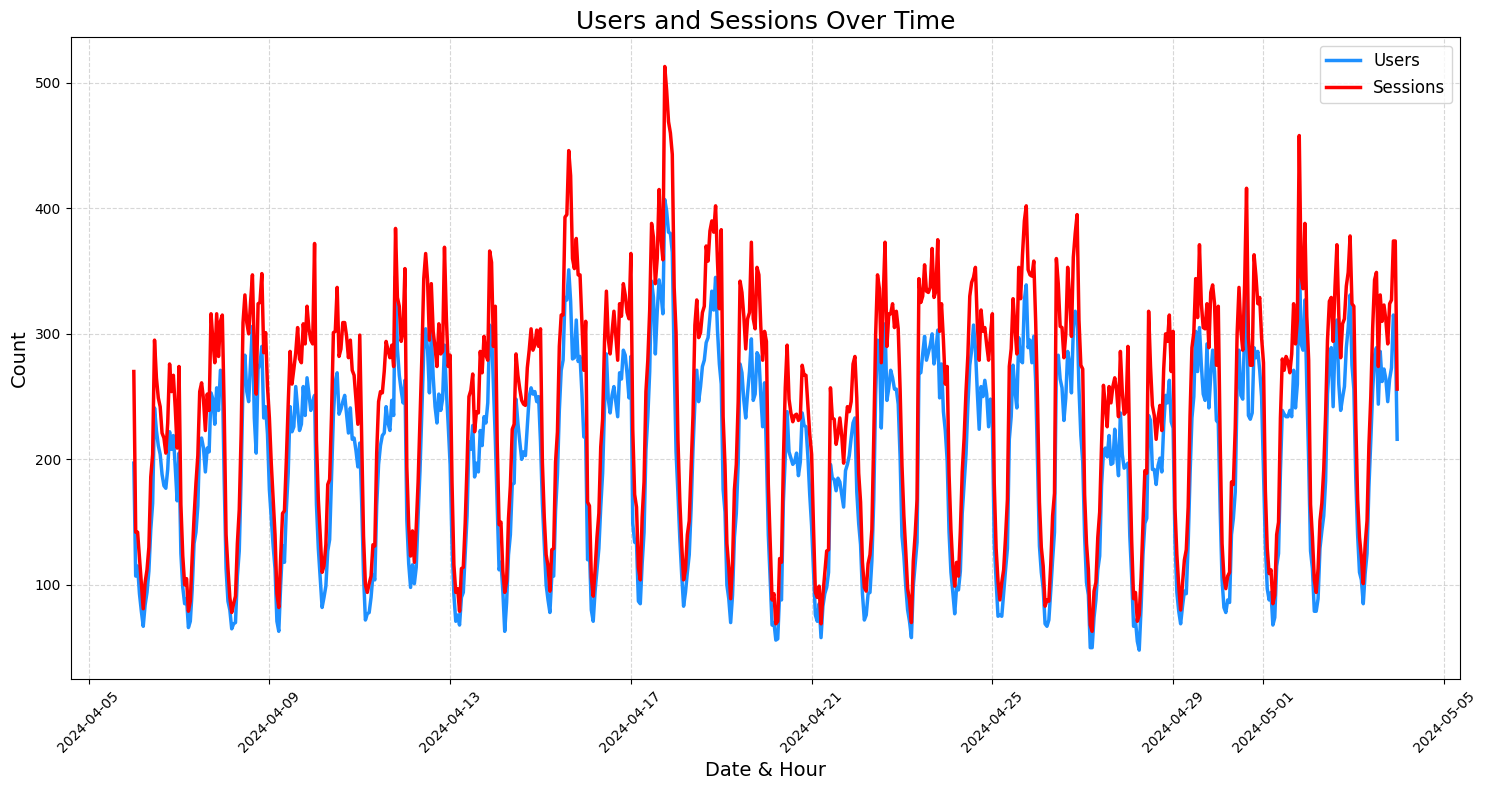

In [55]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=grouped, x=grouped.index, y='Users', label='Users', color='dodgerblue', linewidth=2.5)
sns.lineplot(data=grouped, x=grouped.index, y='Sessions', label='Sessions', color='red', linewidth=2.5)
plt.title('Users and Sessions Over Time', fontsize=18)
plt.xlabel('Date & Hour', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [47]:
cols_to_numeric = ['Engaged sessions', 'Average engagement time per session', 'Engaged sessions per user', 'Events per session', 'Engagement rate']
for col in cols_to_numeric:
    data[col] = pd.to_numeric(data[col])

engagement = data.groupby('Date + hour (YYYYMMDDHH)').agg({
    'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'
})


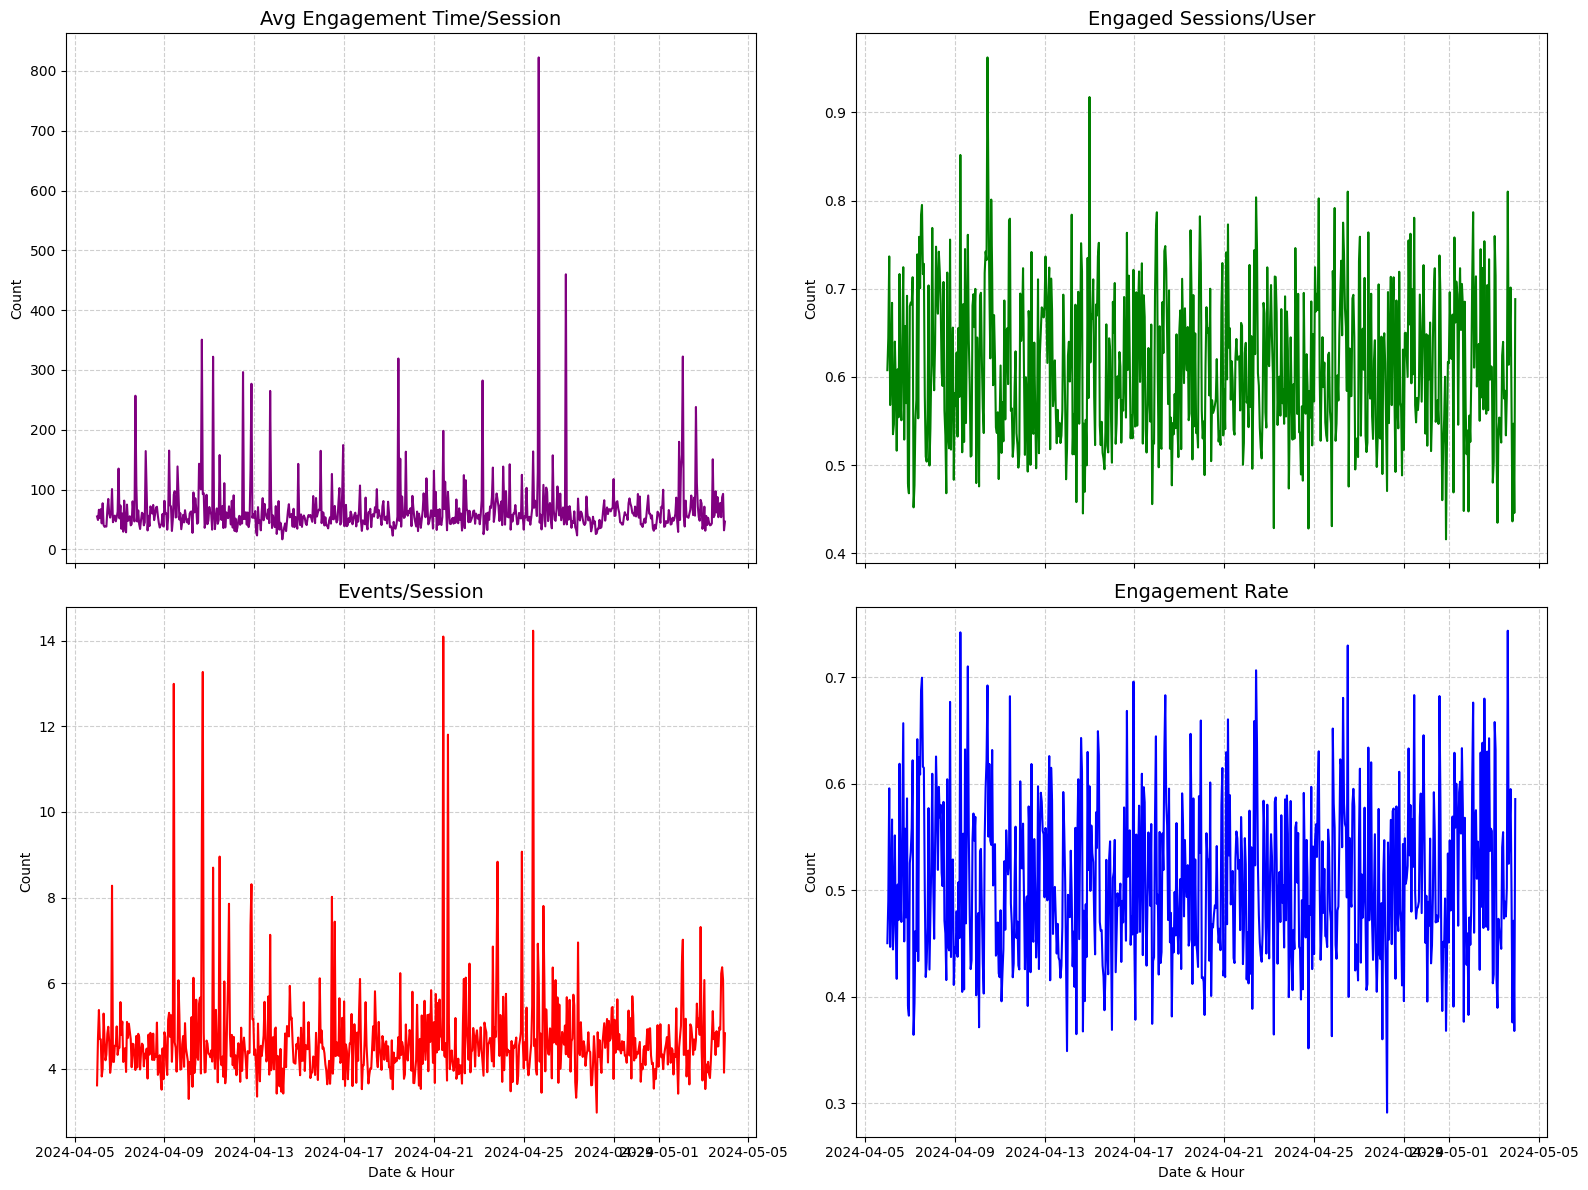

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=True)
sns.lineplot(data=engagement, x=engagement.index, y='Average engagement time per session', ax=axes[0, 0], color='purple')
sns.lineplot(data=engagement, x=engagement.index, y='Engaged sessions per user', ax=axes[0, 1], color='green')
sns.lineplot(data=engagement, x=engagement.index, y='Events per session', ax=axes[1, 0], color='red')
sns.lineplot(data=engagement, x=engagement.index, y='Engagement rate', ax=axes[1, 1], color='blue')

axes[0, 0].set_title('Avg Engagement Time/Session', fontsize=14)
axes[0, 1].set_title('Engaged Sessions/User', fontsize=14)
axes[1, 0].set_title('Events/Session', fontsize=14)
axes[1, 1].set_title('Engagement Rate', fontsize=14)

for ax in axes.flat:
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_ylabel('Count')
    ax.set_xlabel('Date & Hour')

plt.tight_layout()
plt.show()


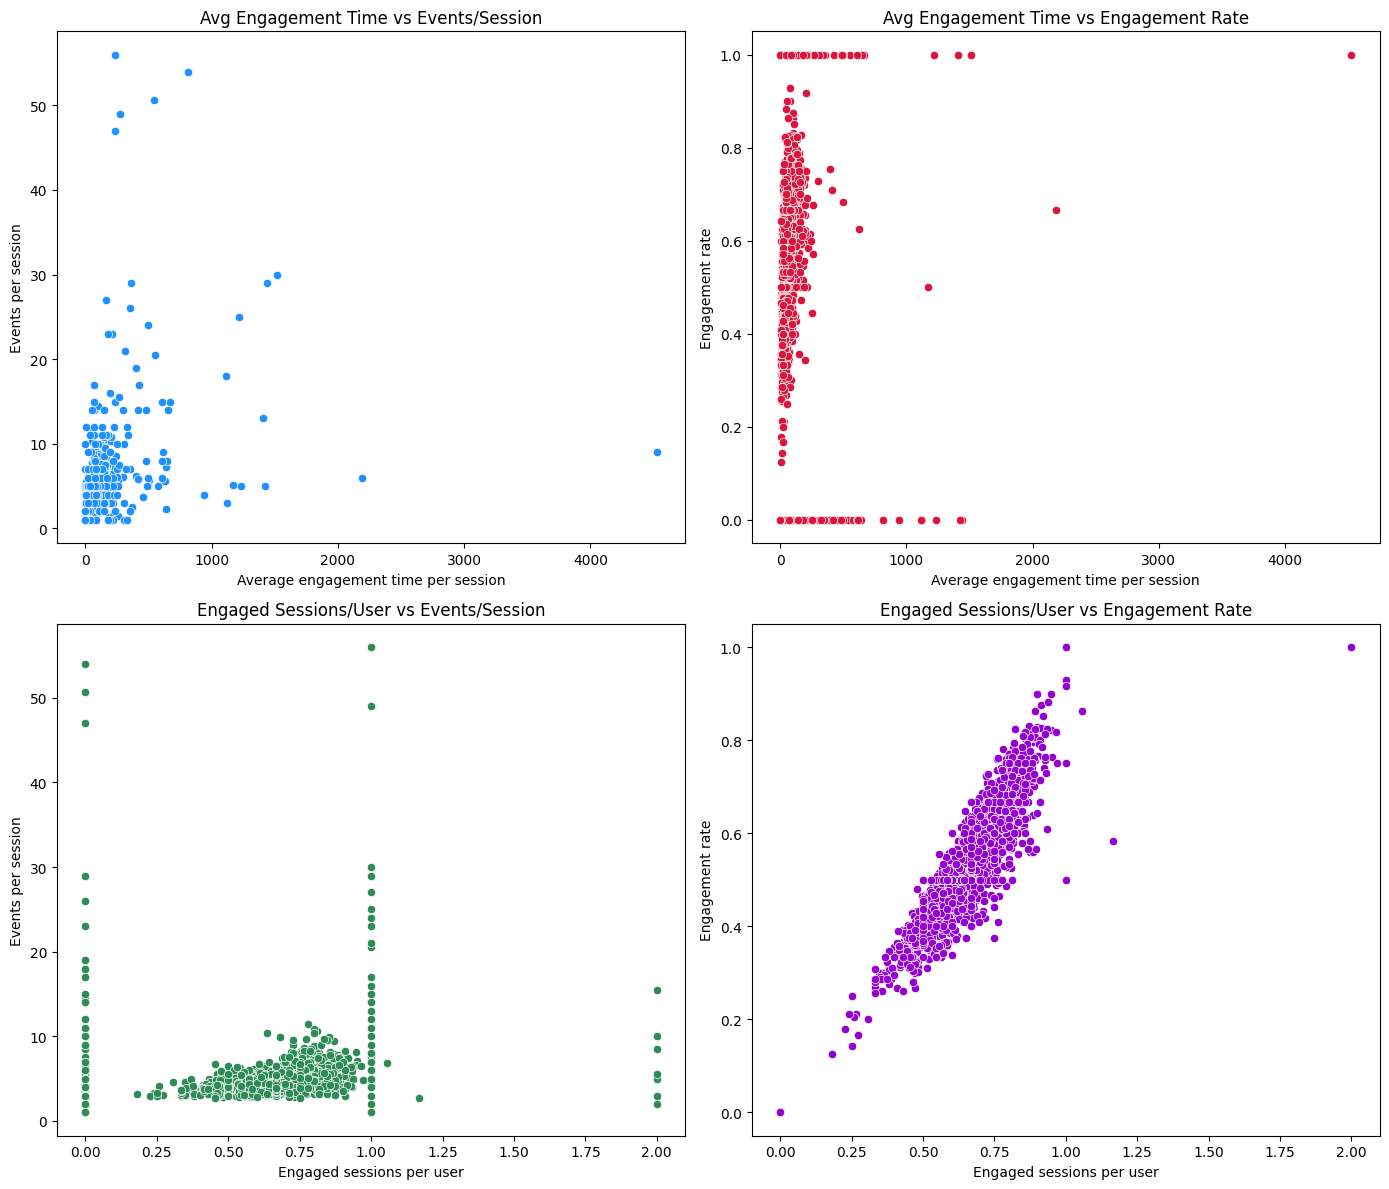

In [49]:
fig, scatter_axes = plt.subplots(2, 2, figsize=(14, 12))
sns.scatterplot(data=data, x='Average engagement time per session', y='Events per session', ax=scatter_axes[0, 0], color='dodgerblue')
sns.scatterplot(data=data, x='Average engagement time per session', y='Engagement rate', ax=scatter_axes[0, 1], color='crimson')
sns.scatterplot(data=data, x='Engaged sessions per user', y='Events per session', ax=scatter_axes[1, 0], color='seagreen')
sns.scatterplot(data=data, x='Engaged sessions per user', y='Engagement rate', ax=scatter_axes[1, 1], color='darkviolet')

scatter_axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
scatter_axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
scatter_axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
scatter_axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')

plt.tight_layout()
plt.show()


In [50]:
channel_performance = data.groupby('Session primary channel group (Default channel group)').agg({
    'Users': 'sum', 'Sessions': 'sum', 'Engaged sessions': 'sum',
    'Engagement rate': 'mean', 'Events per session': 'mean'
})

channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()


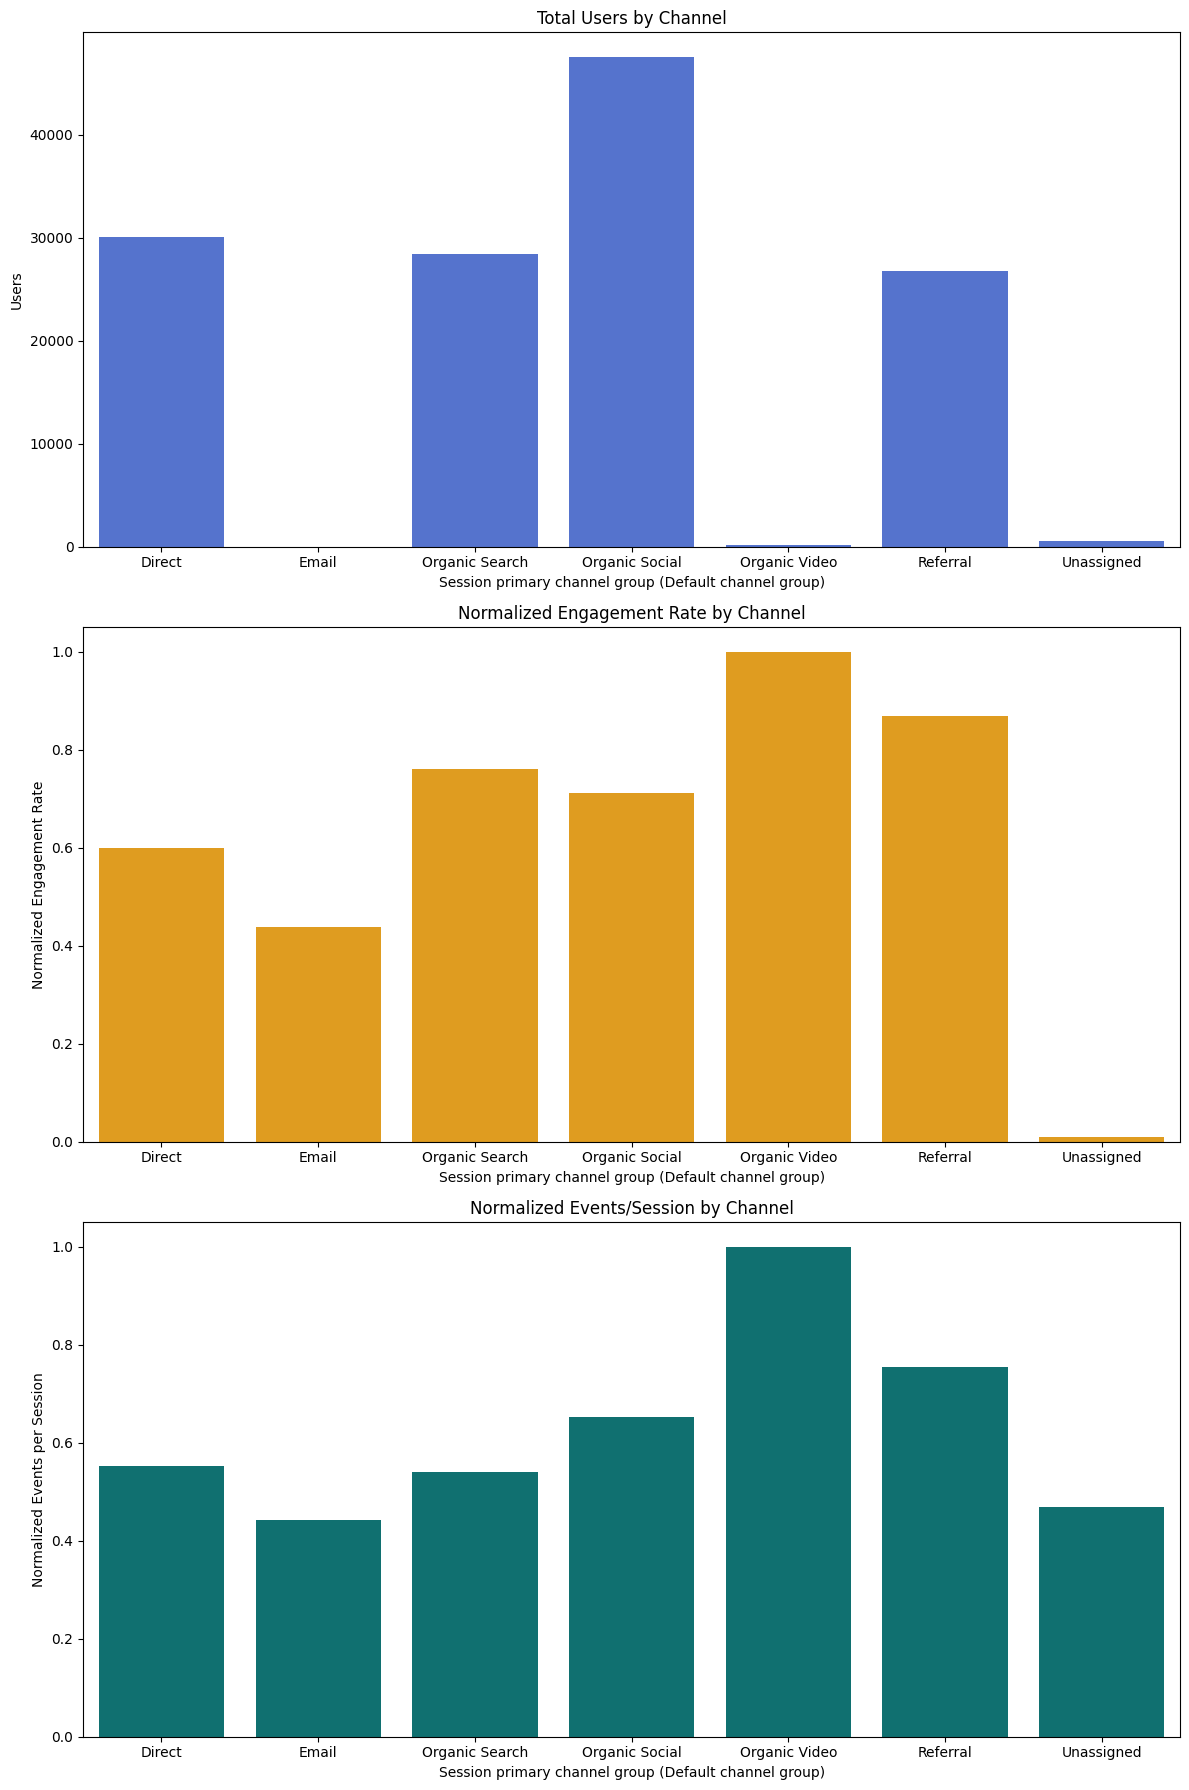

In [52]:
fig, ch_axes = plt.subplots(3, 1, figsize=(12, 18))
sns.barplot(x=channel_performance.index, y=channel_performance['Users'], ax=ch_axes[0], color='royalblue')
sns.barplot(x=channel_performance.index, y=channel_performance['Normalized Engagement Rate'], ax=ch_axes[1], color='orange')
sns.barplot(x=channel_performance.index, y=channel_performance['Normalized Events per Session'], ax=ch_axes[2], color='teal')

ch_axes[0].set_title('Total Users by Channel')
ch_axes[1].set_title('Normalized Engagement Rate by Channel')
ch_axes[2].set_title('Normalized Events/Session by Channel')

plt.tight_layout()
plt.show()


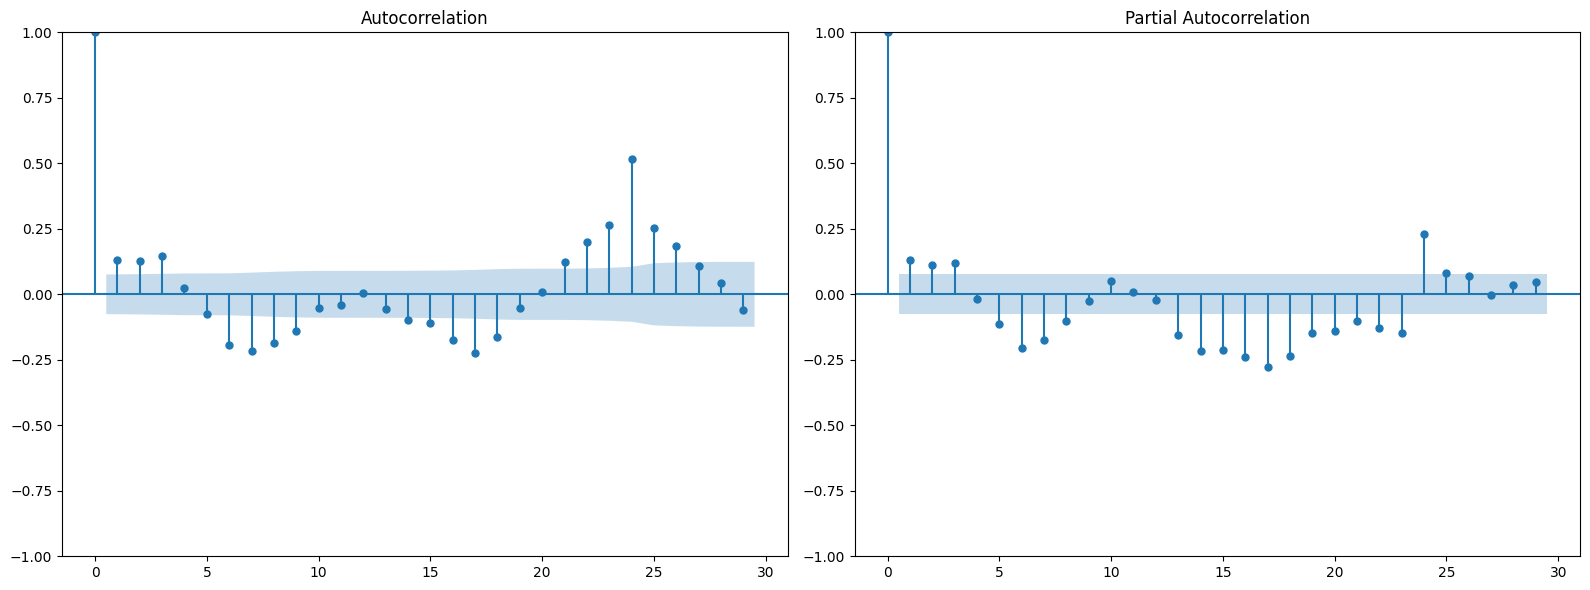

In [53]:
sessions_time_series = grouped['Sessions'].asfreq('H').fillna(method='ffill')
differenced_sessions = sessions_time_series.diff().dropna()

fig, ts_axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(differenced_sessions, ax=ts_axes[0])
plot_pacf(differenced_sessions, ax=ts_axes[1])
plt.tight_layout()
plt.show()


Interpretation of the PACF and ACF graphs:

- **PACF**: The significant spike at lag 1, followed by a cut-off, suggests an AR model of order 1 (p=1).
- **ACF**: The spike at lag 1 with gradual tailing off indicates a potential MA model of order 1 (q=1).
- **d (seasonality)**: Since seasonality exists, we set d=1 for differencing.

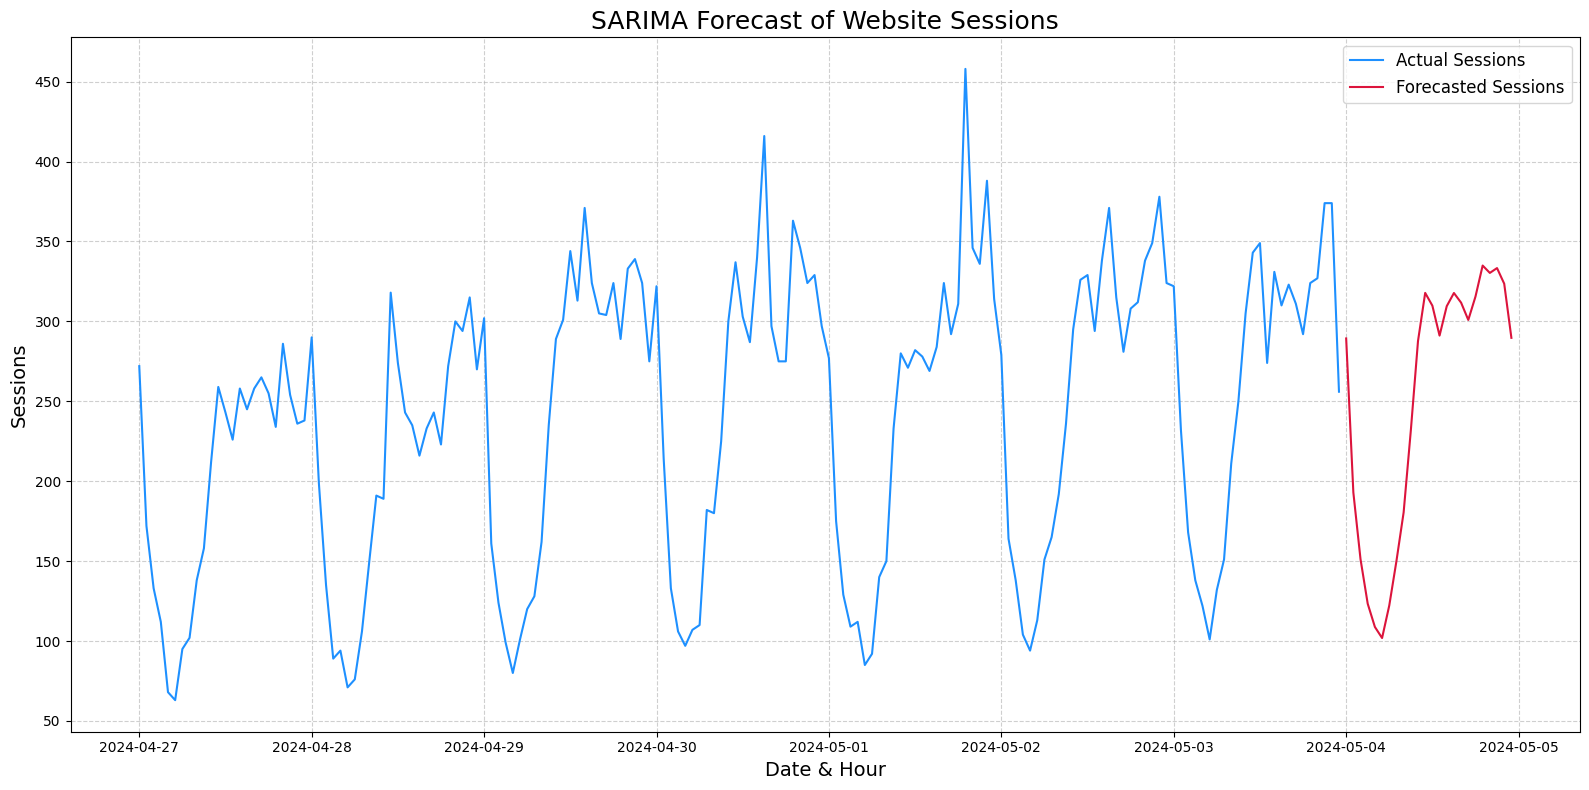

In [54]:
sarima_model = SARIMAX(sessions_time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(steps=24)

plt.figure(figsize=(16, 8))
plt.plot(sessions_time_series.index[-168:], sessions_time_series[-168:], label='Actual Sessions', color='dodgerblue')
plt.plot(pd.date_range(sessions_time_series.index[-1], periods=25, freq='H')[1:], sarima_forecast, label='Forecasted Sessions', color='crimson')
plt.title('SARIMA Forecast of Website Sessions', fontsize=18)
plt.xlabel('Date & Hour', fontsize=14)
plt.ylabel('Sessions', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
